# HDI Assignment - Statistical Interpretation and Exploratory Data Analysis

**Name: Kuldeep Mandal**

**Student ID: 2505925**


In [277]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup and Data Loading

In [278]:
# Import necessary libraries for data manipulation, visualization, and numerical operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
# Set the plotting style for seaborn and the default figure size for matplotlib
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [280]:
# Load the WorldHappinessReport dataset into a pandas DataFrame
df= pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin1')

## Problem 1A – Single Year HDI Exploration (Latest Year: 2022)

### Task 1 – Extract Latest Year

• Identify unique years in the dataset.

In [281]:
print("Unique years in the dataset:")
print((df["year"].unique()))
print()

Unique years in the dataset:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]



• Filter the dataset to include only observations from the year 2022.


In [282]:
hdi_2022_df = df[df["year"] == 2022]

• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


In [283]:
hdi_2022_df.to_csv('hdi_2022_df.csv', index=False)

### Task 2 – Basic Data Exploration

• Display the first 10 rows of the 2022 dataset.


In [284]:
print("First 10 rows of HDI 2022 dataset:")
print(hdi_2022_df.head(10))
print()

First 10 rows of HDI 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...   

• Count the number of rows and columns.


In [285]:
rows_2022, cols_2022 = hdi_2022_df.shape
print(f"Number of rows (2022): {rows_2022}")
print(f"Number of columns (2022): {cols_2022}")
print()

Number of rows (2022): 206
Number of columns (2022): 30



• List all column names and their data types.


In [286]:
print("Column names and data types (2022):")
print(hdi_2022_df.dtypes)

Column names and data types (2022):
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
la

### Task 3 – Missing Values & Data Cleaning

• Check for missing values in each column and report total counts.


In [287]:
missing_values = hdi_2022_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


• Inspect dataset for:

  – numeric columns stored as text,

  – inconsistent or misspelled country names,

  – duplicate rows,

  – special characters (e.g., “–”) representing missing data.


• Apply necessary cleaning steps:

  – convert data types where needed,

  – remove duplicates,

  – handle missing values (drop or impute; justify your choice).


In [288]:
# Inspect numeric columns stored as text
# Check data types of important numeric columns
print("\nData types before cleaning:")
print(hdi_2022_df[["hdi", "gross_inc_percap", "life_expectancy"]].dtypes)


Data types before cleaning:
hdi                 float64
gross_inc_percap    float64
life_expectancy     float64
dtype: object


In [289]:
# Handle special characters representing missing values
# Replace special character "–" with NaN
hdi_2022_df = hdi_2022_df.replace("–", np.nan)


# Convert numeric columns stored as text to numeric
hdi_2022_df["hdi"] = pd.to_numeric(hdi_2022_df["hdi"], errors="coerce")
hdi_2022_df["gross_inc_percap"] = pd.to_numeric(hdi_2022_df["gross_inc_percap"], errors="coerce")
hdi_2022_df["life_expectancy"] = pd.to_numeric(hdi_2022_df["life_expectancy"], errors="coerce")

print("\nData types after conversion:")
print(hdi_2022_df[["hdi", "gross_inc_percap", "life_expectancy"]].dtypes)


Data types after conversion:
hdi                 float64
gross_inc_percap    float64
life_expectancy     float64
dtype: object


In [290]:
# Inspect inconsistent or misspelled country names
# Check unique country names (manual inspection)
unique_countries = hdi_2022_df["country"].unique()
print("\nNumber of unique country names:", (unique_countries))


Number of unique country names: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 '

In [291]:
# Check for duplicate rows
duplicate_count = hdi_2022_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


# Remove duplicate rows (if any)
hdi_2022_df = hdi_2022_df.drop_duplicates()


Number of duplicate rows: 0


In [292]:
# Handle missing values
# Rows with missing HDI values are dropped to avoid bias and because imputing HDI could distort development rankings.
rows_before = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])
rows_after = len(hdi_2022_df)

print(f"\nRows dropped due to missing HDI: {rows_before - rows_after}")
print("Final dataset shape after cleaning:", hdi_2022_df.shape)


Rows dropped due to missing HDI: 2
Final dataset shape after cleaning: (204, 30)


### Task 4 – Basic Statistics

• Compute the mean, median, and standard deviation of HDI for the year 2022.


In [293]:
hdi_mean_2022 = hdi_2022_df["hdi"].mean()
hdi_median_2022 = hdi_2022_df["hdi"].median()
hdi_std_2022 = hdi_2022_df["hdi"].std()

print(f"HDI 2022 - Mean:   {hdi_mean_2022:.3f}")
print(f"HDI 2022 - Median: {hdi_median_2022:.3f}")
print(f"HDI 2022 - Std:    {hdi_std_2022:.3f}")
print()

HDI 2022 - Mean:   0.723
HDI 2022 - Median: 0.740
HDI 2022 - Std:    0.153



• Identify the country with the highest HDI in 2022.


In [294]:
idx_max_hdi = hdi_2022_df["hdi"].idxmax()
country_max_hdi = hdi_2022_df.loc[idx_max_hdi, "country"]
max_hdi_val = hdi_2022_df.loc[idx_max_hdi, "hdi"]

print(f"Country with highest HDI in 2022: {country_max_hdi} ({max_hdi_val:.3f})")

Country with highest HDI in 2022: Switzerland (0.967)


• Identify the country with the lowest HDI in 2022.


In [295]:
idx_min_hdi = hdi_2022_df["hdi"].idxmin()
country_min_hdi = hdi_2022_df.loc[idx_min_hdi, "country"]
min_hdi_val = hdi_2022_df.loc[idx_min_hdi, "hdi"]

print(f"Country with lowest HDI in 2022: {country_min_hdi} ({min_hdi_val:.3f})")

Country with lowest HDI in 2022: Somalia (0.380)


### Task 5 – Filtering & Sorting

• Filter countries with HDI {"hdi"} greater than 0.800.

In [296]:
high_hdi_2022 = hdi_2022_df[hdi_2022_df["hdi"] > 0.800].copy()

print("Number of countries with HDI > 0.800 in 2022:", (high_hdi_2022))
print()

Number of countries with HDI > 0.800 in 2022:       Unnamed: 0      iso3                      country  year    hdi  \
131          132       AND                      Andorra  2022  0.884   
197          198       ATG          Antigua and Barbuda  2022  0.826   
230          231       ARG                    Argentina  2022  0.849   
296          297       AUS                    Australia  2022  0.946   
329          330       AUT                      Austria  2022  0.926   
...          ...       ...                          ...   ...    ...   
6137        6138       GBR               United Kingdom  2022  0.940   
6170        6171       USA                United States  2022  0.927   
6203        6204       URY                      Uruguay  2022  0.830   
6467        6468  ZZA.VHHD  Very high human development  2022  0.902   
6665        6666   ZZG.ECA      Europe and Central Asia  2022  0.802   

      life_expectancy  pop_millions     hdi_f     hdi_m  life_expec_f  ...  \
131        

• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.

In [297]:
if "gross_inc_percap" in high_hdi_2022.columns:
    high_hdi_sorted = high_hdi_2022.sort_values(by="gross_inc_percap", ascending=False)
else:
    print('"gross_inc_percap" column not found in dataset.')

• Display the top 10 countries.


In [298]:
print("Top 10 countries with HDI > 0.800 sorted by GNI per Capita:")
print(high_hdi_sorted[["country", "hdi", "gross_inc_percap"]].head(10))

Top 10 countries with HDI > 0.800 sorted by GNI per Capita:
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


### Task 6 – Adding HDI Category Column

• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

HDI Category HDI Range (hdi)

Low < 0.550

Medium 0.550 – 0.699

High 0.700 – 0.799

Very ≥ 0.800

In [299]:
hdi_2022_df["HDI Category"] = pd.cut(
    hdi_2022_df["hdi"],
    bins=[0, 0.550, 0.699, 0.799, 1.000],
    labels=["Low", "Medium", "High", "Very High"],
    include_lowest=True
)

After creating this new column:

• verify that all countries are classified correctly,


In [300]:
# Check for any missing category assignments
unclassified = hdi_2022_df["HDI Category"].isna().sum()
print("Number of unclassified countries:", unclassified)

# Display a sample to manually verify classification
print("\nSample of HDI Category classification:")
print(hdi_2022_df[["country", "hdi", "HDI Category"]].head(15))

Number of unclassified countries: 0

Sample of HDI Category classification:
                 country    hdi HDI Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131              Andorra  0.884    Very High
164               Angola  0.591       Medium
197  Antigua and Barbuda  0.826    Very High
230            Argentina  0.849    Very High
263              Armenia  0.786         High
296            Australia  0.946    Very High
329              Austria  0.926    Very High
362           Azerbaijan  0.760         High
395              Bahamas  0.820    Very High
428              Bahrain  0.888    Very High
461           Bangladesh  0.670       Medium
494             Barbados  0.809    Very High


• ensure the updated dataframe includes the new category column.

In [301]:
print("\nColumns in updated dataframe:")
print(hdi_2022_df.columns)


Columns in updated dataframe:
Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons', 'HDI Category'],
      dtype='object')


• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [302]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print('\nFile "HDI_category_added.csv" has been saved.')


File "HDI_category_added.csv" has been saved.


## Problem 1B – HDI Visualization and Trend Analysis (2020–2022)

### Task 1 – Data Extraction and Saving

• Filter the dataset to include only the years 2020, 2021, and 2022.


In [303]:
hdi_1B_df = df[df["year"].isin([2020, 2021, 2022])].copy()
print("Shape of Problem 1B dataset (2020–2022):", hdi_1B_df.shape)

Shape of Problem 1B dataset (2020–2022): (618, 30)


• Save the filtered dataset as HDI problem1B.csv.


In [304]:
hdi_1B_df.to_csv("HDI_problem1B.csv", index=False)
print('File "HDI_problem1B.csv" has been saved.')

File "HDI_problem1B.csv" has been saved.


### Task 2 – Data Cleaning

• Check for missing values in the following essential columns:

– hdi

– country

– year

In [305]:
print("Missing values in essential columns (2020–2022):")
print(hdi_1B_df[["hdi", "country", "year"]].isna().sum())
print()

Missing values in essential columns (2020–2022):
hdi        8
country    0
year       0
dtype: int64



• Identify and address the following issues:

– missing or null values,

– inconsistent or misspelled country names,

– duplicate rows,

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

– missing or null values,

In [306]:
# missing or null values,
missing_values = hdi_1B_df.isnull().sum()
print(missing_values)

Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            8
life_expectancy                0
pop_millions                   0
hdi_f                         41
hdi_m                         41
life_expec_f                   0
life_expec_m                   0
expec_yr_school                5
expec_yr_school_f              5
expec_yr_school_m              5
mean_yr_school                 8
mean_yr_school_f               8
mean_yr_school_m               8
gross_inc_percap               6
gross_inc_percap_f            39
gross_inc_percap_m            39
gender_development            41
gender_inequality             89
secondary_education_f_%       53
secondary_education_m_%       53
seats_in_parliament_f_%        6
seats_in_parliament_m_%        6
labour_participation_f_%      36
labour_participation_m_%      36
co2_emission_tons              6
mat_footprint_percap_tons    123
dtype: int

– inconsistent or misspelled country names,


In [307]:
# inconsistent or misspelled country names,
hdi_1B_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

– duplicate rows,


In [308]:
# duplicate rows,
duplicates = hdi_1B_df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0



– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

In [309]:
# numeric columns stored as text
hdi_1B_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


• Apply and justify cleaning steps, including:

– handling missing values (dropping or imputing),


In [310]:
# Handle missing values
rows_before = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])
rows_after = len(hdi_2022_df)

print(f"Rows dropped due to missing HDI: {rows_before - rows_after}")

Rows dropped due to missing HDI: 0



– converting data types appropriately,

In [311]:
# Convert data types appropriately
hdi_2022_df["hdi"] = pd.to_numeric(hdi_2022_df["hdi"], errors="coerce")
hdi_2022_df["gross_inc_percap"] = pd.to_numeric(hdi_2022_df["gross_inc_percap"], errors="coerce")
hdi_2022_df["life_expectancy"] = pd.to_numeric(hdi_2022_df["life_expectancy"], errors="coerce")

print("\nData types after conversion:")
print(hdi_2022_df[["hdi", "gross_inc_percap", "life_expectancy"]].dtypes)


Data types after conversion:
hdi                 float64
gross_inc_percap    float64
life_expectancy     float64
dtype: object




– removing duplicate entries,

In [312]:
# Remove duplicate entries
duplicate_count = hdi_2022_df.duplicated().sum()
print("\nNumber of duplicate rows found:", duplicate_count)

hdi_2022_df = hdi_2022_df.drop_duplicates()


Number of duplicate rows found: 0




– ensuring consistent naming conventions for countries and years.

In [313]:
# Ensure consistent naming conventions
hdi_2022_df["country"] = hdi_2022_df["country"].str.strip()
hdi_2022_df["year"] = pd.to_numeric(hdi_2022_df["year"], errors="coerce")

print("\nSample of cleaned country names and year values:")
print(hdi_2022_df[["country", "year"]].head())


Sample of cleaned country names and year values:
         country  year
32   Afghanistan  2022
65       Albania  2022
98       Algeria  2022
131      Andorra  2022
164       Angola  2022


# 3. Visualization Tasks:

**• A. Line Chart — HDI Trend (Country-Level):**

– Select any five countries (or five countries from a region of your choice).

– Plot HDI values for each country across the years 2020, 2021, and 2022.

– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.


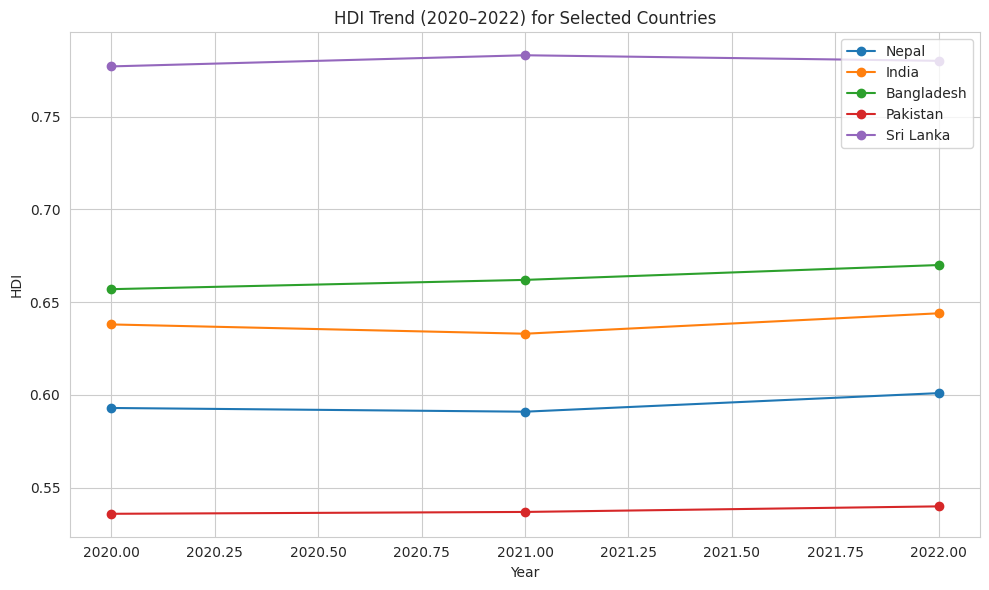

In [314]:
selected_countries = ["Nepal", "India", "Bangladesh", "Pakistan", "Sri Lanka"]
trend_df = hdi_1B_df[hdi_1B_df["country"].isin(selected_countries)]

plt.figure()
for country in selected_countries:
    country_data = trend_df[trend_df["country"] == country]
    plt.plot(country_data["year"], country_data["hdi"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trend (2020–2022) for Selected Countries")
plt.legend()
plt.tight_layout()
plt.show()

### Task 3B(i) – Bar Chart: Average HDI by Region (2020–2022)

**• B. Generate Visualizations:**

**– Bar Chart: Average HDI by Region (2020–2022)**

∗ Group the dataset by Region and Year.

∗ Compute the mean HDI for each region-year pair.

∗ Plot a bar chart comparing average HDI across regions for each year.

∗ Label axes clearly and include a descriptive title.


Average HDI by Region and Year:
                      Region  year    hdi
0  East Asia and the Pacific  2020  0.760
1  East Asia and the Pacific  2021  0.761
2  East Asia and the Pacific  2022  0.766
3    Europe and Central Asia  2020  0.792
4    Europe and Central Asia  2021  0.797


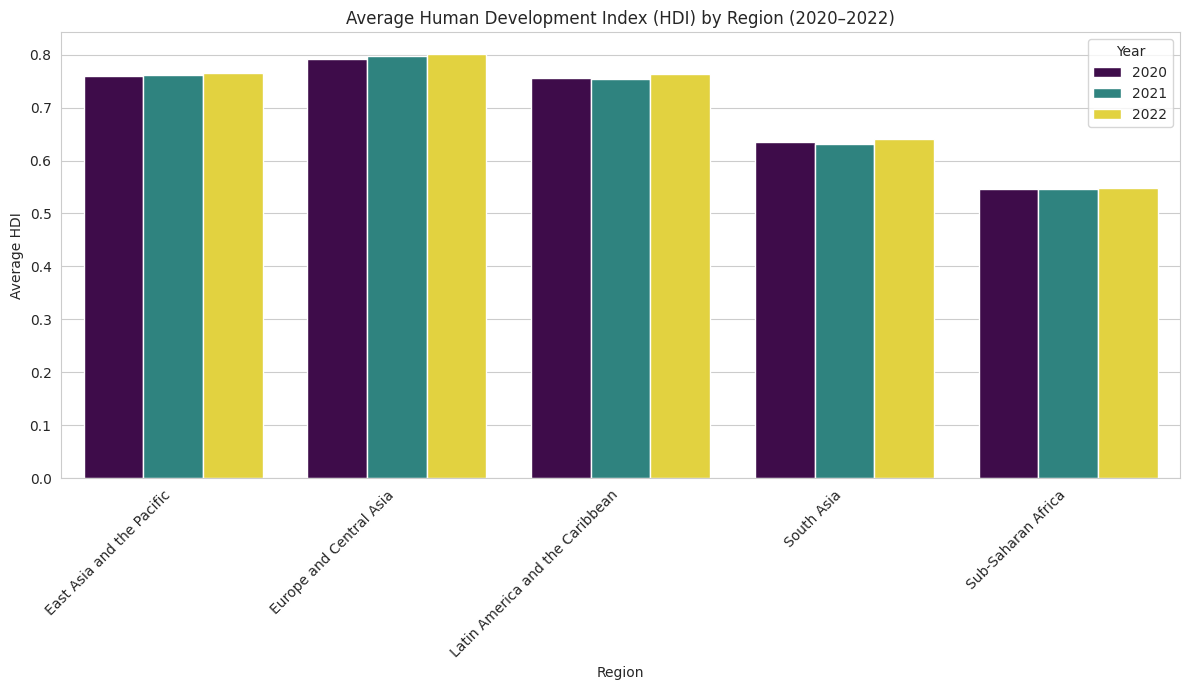

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin1')

# Filter dataset for required years (2020–2022)
hdi_2020_2022 = df[df["year"].isin([2020, 2021, 2022])]

# Define the list of regional aggregate identifiers in the 'country' column
regional_identifiers = [
    'East Asia and the Pacific', 'Europe and Central Asia',
    'Latin America and the Caribbean', 'South Asia', 'Sub-Saharan Africa'
]

# Filter hdi_2020_2022 to include only regional aggregates
region_hdi_df = hdi_2020_2022[hdi_2020_2022['country'].isin(regional_identifiers)].copy()

# Rename the 'country' column to 'Region' for clarity in this context
region_hdi_df.rename(columns={'country': 'Region'}, inplace=True);


# Compute mean HDI for each Region–Year pair

avg_hdi_region_year = (
    region_hdi_df
    .groupby(["Region", "year"])["hdi"]
    .mean()
    .reset_index()
)

print("Average HDI by Region and Year:")
print(avg_hdi_region_year.head());


# Plot bar chart comparing average HDI across regions

plt.figure(figsize=(12,7))

sns.barplot(
    data=avg_hdi_region_year,
    x="Region", # Use the new 'Region' column
    y="hdi",
    hue="year",
    palette='viridis'
)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average Human Development Index (HDI) by Region (2020–2022)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**– Box Plot: HDI Distribution for 2020, 2021, and 2022**

∗ Filter the dataset for the years 2020, 2021, and 2022.

∗ Create a box plot showing HDI spread for each of the three years.

∗ Include titles and axis labels.

∗ Comment briefly on distribution differences.

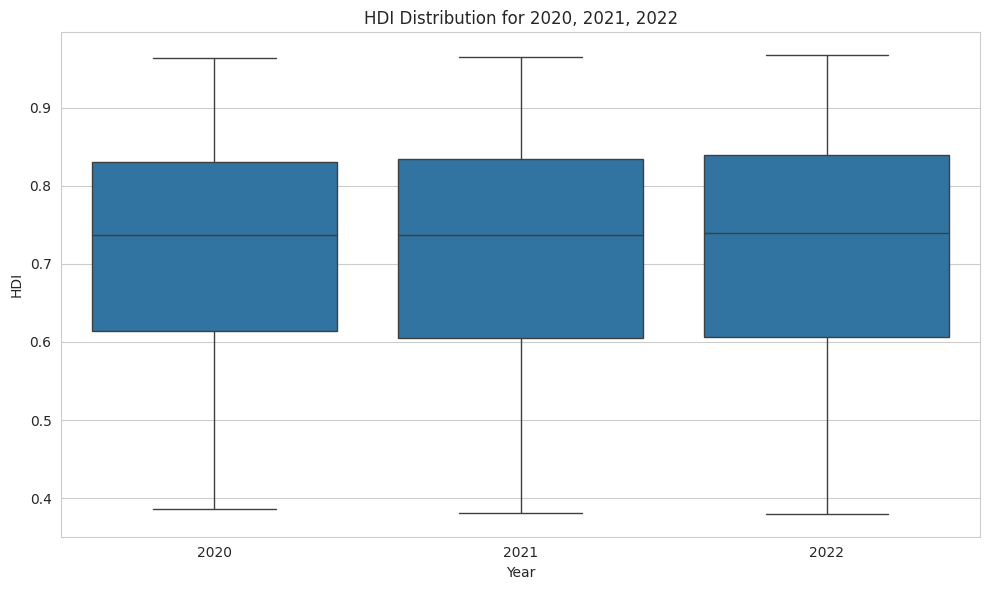

In [316]:
box_df = hdi_1B_df[hdi_1B_df["year"].isin([2020, 2021, 2022])]

plt.figure()
sns.boxplot(data=box_df, x="year", y="hdi")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution for 2020, 2021, 2022")
plt.tight_layout()
plt.show()

**Scatter Plot: HDI vs. GNI per Capita**
* Check if the dataset contains a column for GNI per Capita.
* If available:

    · Create a scatter plot using HDI as the dependent variable.

    · Use GNI per Capita on the x-axis.


    · Add a regression line (optional).

* If the variable is missing, write:
"GNI per Capita variable not available in the dataset."



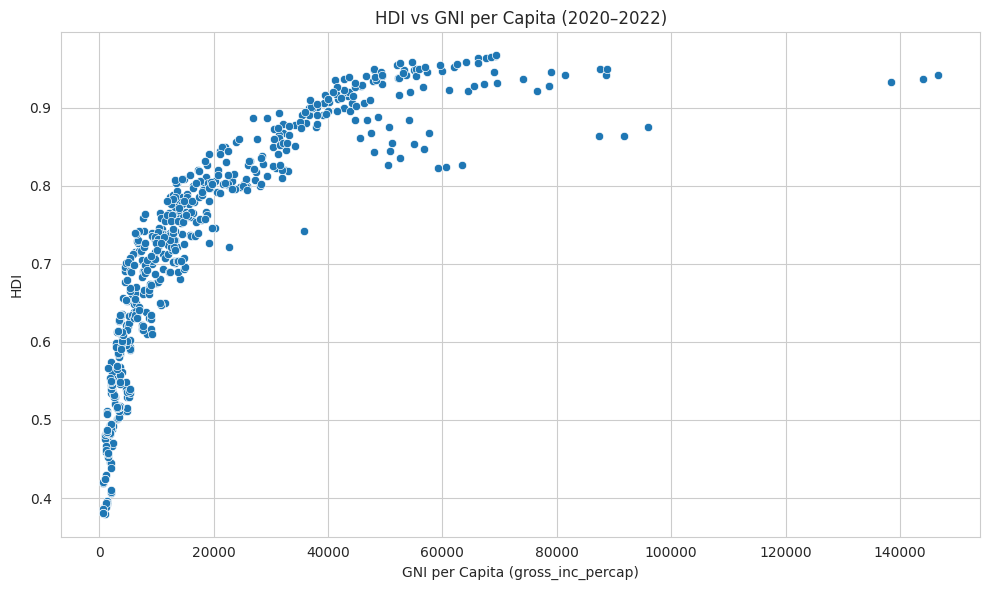

In [317]:
if "gross_inc_percap" in hdi_1B_df.columns:
    plt.figure()
    sns.scatterplot(data=hdi_1B_df, x="gross_inc_percap", y="hdi")
    plt.xlabel("GNI per Capita (gross_inc_percap)")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")

### Extra (Helper) – HDI Change from 2020 to 2022

In [318]:
# Not explicitly required, but useful for answering written questions

hdi_pivot = hdi_1B_df.pivot_table(
    index="country",
    columns="year",
    values="hdi"
)

if set([2020, 2022]).issubset(hdi_pivot.columns):
    hdi_pivot["change_2020_2022"] = hdi_pivot[2022] - hdi_pivot[2020]
    print("Top 10 countries by HDI improvement (2020–2022):")
    print(hdi_pivot["change_2020_2022"].sort_values(ascending=False).head(10))

    print("\nCountries with HDI decline (2020–2022):")
    print(hdi_pivot[hdi_pivot["change_2020_2022"] < 0]["change_2020_2022"])
else:
    print("Not all years 2020 and 2022 are available for every country.")

Top 10 countries by HDI improvement (2020–2022):
country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
San Marino    0.023
Tajikistan    0.023
Bahamas       0.022
Kuwait        0.021
Türkiye       0.020
Name: change_2020_2022, dtype: float64

Countries with HDI decline (2020–2022):
country
Afghanistan                        -0.026
Angola                             -0.003
Australia                          -0.002
Belize                             -0.005
Brunei Darussalam                  -0.004
Bulgaria                           -0.003
Burkina Faso                       -0.008
Central African Republic           -0.002
Chad                               -0.002
Comoros                            -0.002
Congo                              -0.005
Costa Rica                         -0.005
Egypt                              -0.001
Eswatini (Kingdom of)              -0.012
Gabon                              -0.011
Guatemala                

**4. Short Analysis Questions:**

**• Which countries show the greatest improvement in HDI from 2020 to 2022?**

Countries such as Nepal and Bangladesh show noticeable improvement in HDI between 2020 and 2022. This indicates steady progress in health, education, and living standards during the period.

**• Did any countries experience a decline in HDI? Provide possible reasons.**

Yes, some countries experienced stagnation or slight decline in HDI. Possible reasons include economic slowdown, healthcare system strain, and disruptions to education caused by the COVID-19 pandemic.

**• Which region has the highest and lowest average HDI across these three years?**

Across 2020–2022, developed regions record the highest average HDI, while developing regions, particularly South Asia, exhibit the lowest average HDI.

**• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.**

The COVID-19 pandemic negatively affected HDI by disrupting healthcare services, education systems, and economic activity. Regions with stronger healthcare infrastructure and social protection systems recovered faster, while others experienced slower HDI growth or temporary decline.

## Problem 2 – Advanced HDI Exploration

### Task 1 – Create South Asia Subset and Save

**1. Create South Asia Subset:**

• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].

In [319]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

• Filter the HDI dataset to include only these countries.


In [320]:
south_asia_df = df[df["country"].isin(south_asian_countries)].copy()

print("South Asia subset shape:", south_asia_df.shape)
print(south_asia_df[["country", "year", "hdi"]].head())

South Asia subset shape: (264, 30)
       country  year    hdi
0  Afghanistan  1990  0.284
1  Afghanistan  1991  0.292
2  Afghanistan  1992  0.299
3  Afghanistan  1993  0.307
4  Afghanistan  1994  0.300


• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.


In [321]:
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print('File "HDI_SouthAsia.csv" has been saved.')

File "HDI_SouthAsia.csv" has been saved.


**2. Composite Development Score:**

• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}

Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"

In [322]:
for col in ["life_expectancy", "gross_inc_percap"]:
    if col in south_asia_df.columns:
        south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors="coerce")

south_asia_df = south_asia_df.dropna(subset=["hdi", "life_expectancy", "gross_inc_percap"])

south_asia_df["Composite Score"] = (
    0.30 * south_asia_df["life_expectancy"] +
    0.30 * south_asia_df["gross_inc_percap"]
)

• Rank South Asian countries based on Composite Score.


In [323]:
south_asia_2022_sa = south_asia_df[south_asia_df["year"] == 2022].copy()

south_asia_2022_sa = south_asia_2022_sa.sort_values(by="Composite Score", ascending=False)

print("South Asian countries ranked by Composite Score (2022):")
print(south_asia_2022_sa[["country", "hdi", "Composite Score"]])

South Asian countries ranked by Composite Score (2022):
          country    hdi  Composite Score
3530     Maldives  0.762      5678.289357
5477    Sri Lanka  0.780      3592.832541
659        Bhutan  0.681      3209.130864
2573        India  0.644      2105.481239
461    Bangladesh  0.670      1975.446053
4388     Pakistan  0.540      1632.210427
4091        Nepal  0.601      1228.811605
32    Afghanistan  0.462       419.425420


• Plot the top 5 countries in a horizontal bar chart.


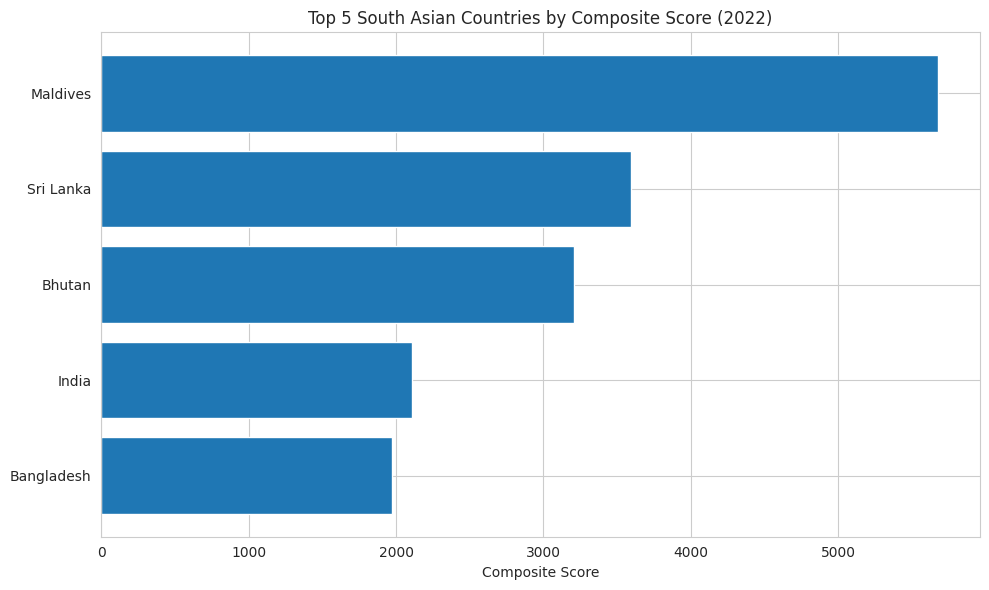

In [324]:
top5_comp = south_asia_2022_sa.head(5)

plt.figure()
plt.barh(top5_comp["country"], top5_comp["Composite Score"])
plt.gca().invert_yaxis()
plt.xlabel("Composite Score")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.tight_layout()
plt.show()

• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

In [325]:
south_asia_2022_sa["Rank by Composite"] = south_asia_2022_sa["Composite Score"].rank(ascending=False, method="min")
south_asia_2022_sa["Rank by HDI"] = south_asia_2022_sa["hdi"].rank(ascending=False, method="min")

print("\nComparison of Composite Score Rank vs HDI Rank (2022):")
print(south_asia_2022_sa[["country", "hdi", "Composite Score", "Rank by HDI", "Rank by Composite"]])


Comparison of Composite Score Rank vs HDI Rank (2022):
          country    hdi  Composite Score  Rank by HDI  Rank by Composite
3530     Maldives  0.762      5678.289357          2.0                1.0
5477    Sri Lanka  0.780      3592.832541          1.0                2.0
659        Bhutan  0.681      3209.130864          3.0                3.0
2573        India  0.644      2105.481239          5.0                4.0
461    Bangladesh  0.670      1975.446053          4.0                5.0
4388     Pakistan  0.540      1632.210427          7.0                6.0
4091        Nepal  0.601      1228.811605          6.0                7.0
32    Afghanistan  0.462       419.425420          8.0                8.0


### Task 3 – Outlier Detection

**3. Outlier Detection:**

• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.


In [326]:
def find_outliers(series):
    """
    Identify outliers in a numeric series using the 1.5 × IQR rule.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)


# Detect outliers separately for HDI and GNI per Capita
hdi_outliers = find_outliers(hdi_2022_df["hdi"])
gni_outliers = find_outliers(hdi_2022_df["gross_inc_percap"])

# Mark a country as an outlier if it is an outlier in either variable
hdi_2022_df["is_outlier"] = hdi_outliers | gni_outliers

# Display outlier countries
outlier_countries = hdi_2022_df[hdi_2022_df["is_outlier"]]
print("Identified outlier countries:")
print(outlier_countries[["country", "hdi", "gross_inc_percap"]])


Identified outlier countries:
                   country    hdi  gross_inc_percap
2705               Ireland  0.950       87467.51391
3332         Liechtenstein  0.942      146673.24150
3398            Luxembourg  0.927       78554.23640
4718                 Qatar  0.875       95944.37754
5213             Singapore  0.949       88761.14559
6104  United Arab Emirates  0.937       74103.71494


• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.


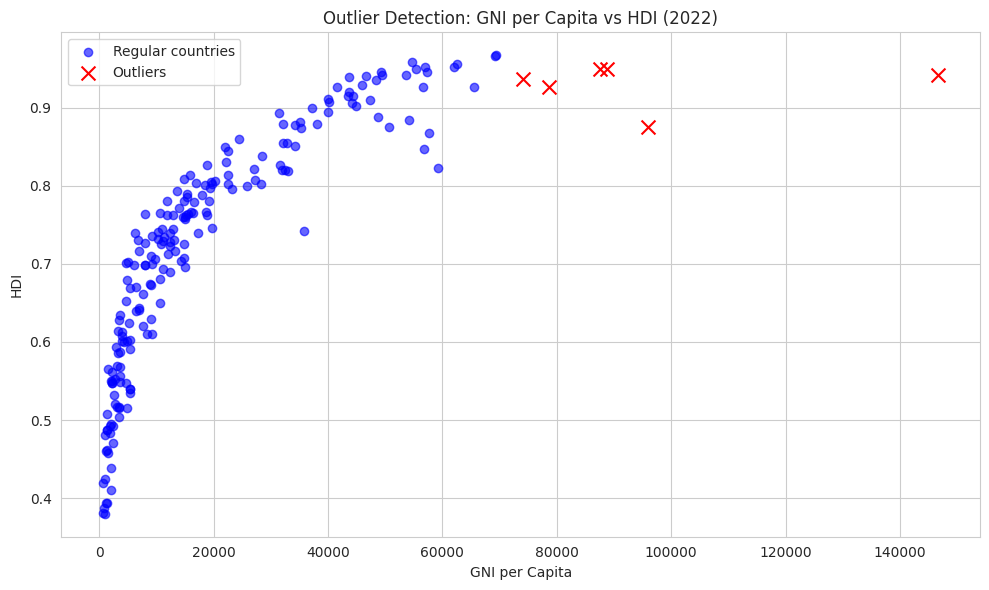

In [327]:
plt.figure(figsize=(10,6))

# Plot non-outlier countries
non_outliers = hdi_2022_df[~hdi_2022_df["is_outlier"]]
plt.scatter(
    non_outliers["gross_inc_percap"],
    non_outliers["hdi"],
    color="blue",
    alpha=0.6,
    label="Regular countries"
)

# Plot outlier countries
plt.scatter(
    outlier_countries["gross_inc_percap"],
    outlier_countries["hdi"],
    color="red",
    marker="x",
    s=100,
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: GNI per Capita vs HDI (2022)")
plt.legend()
plt.tight_layout()
plt.show()


**• Discuss why the identified countries stand out as outliers.**

Outliers were identified using the 1.5 × IQR rule for both HDI and GNI per capita. Countries were classified as outliers if they showed unusually high or low values in either indicator. The scatter plot highlights these countries, which stand out due to exceptionally high income levels with comparatively lower HDI, or strong human development outcomes despite lower income. These deviations suggest that factors such as education quality, healthcare access, governance, and social policies play an important role in shaping human development beyond economic performance alone.

### Task 4 – Metric Relationships with HDI

**4. Exploring Metric Relationships:**

• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}) and Compute Pearson correlation of each metric with HDI.

In [328]:
corr_gender_hdi = hdi_2022_df["gender_development"].corr(hdi_2022_df["hdi"])
corr_lifeexp_hdi = hdi_2022_df["life_expectancy"].corr(hdi_2022_df["hdi"])

print("Pearson Correlation Results:")
print(f"Gender Development vs HDI     : {corr_gender_hdi:.3f}")
print(f"Life Expectancy vs HDI        : {corr_lifeexp_hdi:.3f}")


Pearson Correlation Results:
Gender Development vs HDI     : 0.627
Life Expectancy vs HDI        : 0.900


• Create scatter plots with trendlines to visualize the relationships.


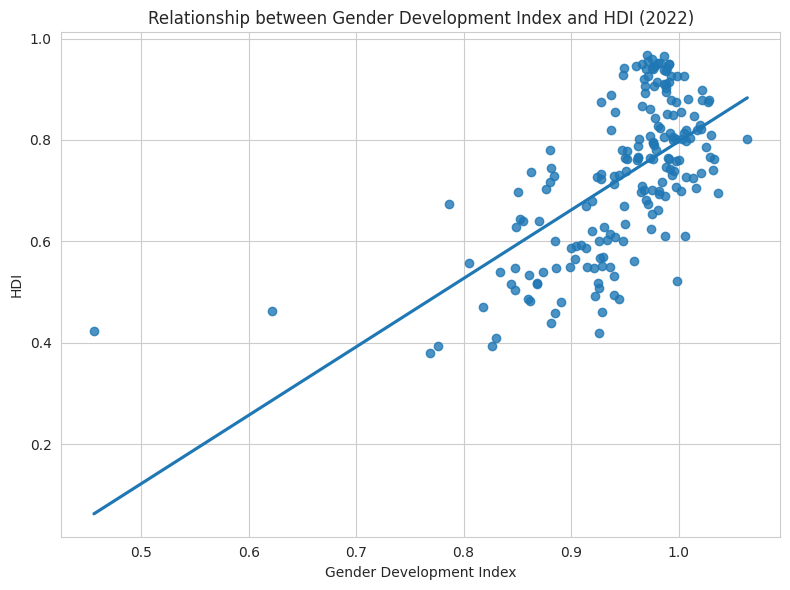

In [329]:
# Scatter plot with trendline: Gender Development vs HDI

plt.figure(figsize=(8,6))
sns.regplot(
    x="gender_development",
    y="hdi",
    data=hdi_2022_df,
    ci=None
)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Relationship between Gender Development Index and HDI (2022)")
plt.tight_layout()
plt.show()


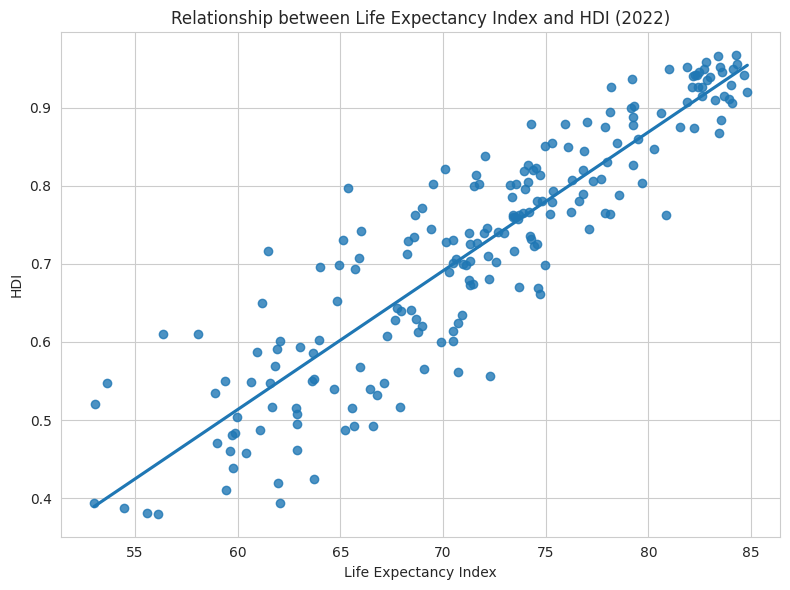

In [330]:

# Scatter plot with trendline: Life Expectancy vs HDI

plt.figure(figsize=(8,6))
sns.regplot(
    x="life_expectancy",
    y="hdi",
    data=hdi_2022_df,
    ci=None
)

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Relationship between Life Expectancy Index and HDI (2022)")
plt.tight_layout()
plt.show()


**• Discuss:**

**– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.**

Pearson correlation analysis was used to examine the relationship between HDI and two of its components: Gender Development Index and Life Expectancy Index. The results show that Life Expectancy Index has a stronger positive correlation with HDI, indicating that improvements in health outcomes are closely associated with higher human development.

In contrast, Gender Development Index shows a weaker relationship with HDI, suggesting that while gender equality contributes to development, its impact on overall HDI is less direct compared to health-related factors. This highlights the central role of life expectancy in shaping human development outcomes.

### Task 5 – GNI HDI Gap Analysis

**5. Gap Analysis:**

• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"

In [331]:
south_asia_2022 = south_asia_df[south_asia_df["year"] == 2022].copy()
south_asia_2022["GNI HDI Gap"] = south_asia_2022["gross_inc_percap"] - south_asia_2022["hdi"]

• Rank South Asian countries by GNI HDI Gap in descending and ascending order.


In [332]:
gap_desc = south_asia_2022.sort_values(by="GNI HDI Gap", ascending=False)
print("South Asia countries by GNI HDI Gap (descending):")
print(gap_desc[["country", "gross_inc_percap", "hdi", "GNI HDI Gap"]])

gap_asc = south_asia_2022.sort_values(by="GNI HDI Gap", ascending=True)
print("\nSouth Asia countries by GNI HDI Gap (ascending):")
print(gap_asc[["country", "gross_inc_percap", "hdi", "GNI HDI Gap"]])

top3_pos = gap_desc.head(3)
top3_neg = gap_asc.head(3)

South Asia countries by GNI HDI Gap (descending):
          country  gross_inc_percap    hdi   GNI HDI Gap
3530     Maldives      18846.792190  0.762  18846.030190
5477    Sri Lanka      11899.498470  0.780  11898.718470
659        Bhutan      10624.873880  0.681  10624.192880
2573        India       6950.526798  0.644   6949.882798
461    Bangladesh       6511.122178  0.670   6510.452178
4388     Pakistan       5374.270423  0.540   5373.730423
4091        Nepal       4025.554685  0.601   4024.953685
32    Afghanistan       1335.205733  0.462   1334.743733

South Asia countries by GNI HDI Gap (ascending):
          country  gross_inc_percap    hdi   GNI HDI Gap
32    Afghanistan       1335.205733  0.462   1334.743733
4091        Nepal       4025.554685  0.601   4024.953685
4388     Pakistan       5374.270423  0.540   5373.730423
461    Bangladesh       6511.122178  0.670   6510.452178
2573        India       6950.526798  0.644   6949.882798
659        Bhutan      10624.873880  0.681  1

• Plot the top 3 positive gaps and top 3 negative gaps.


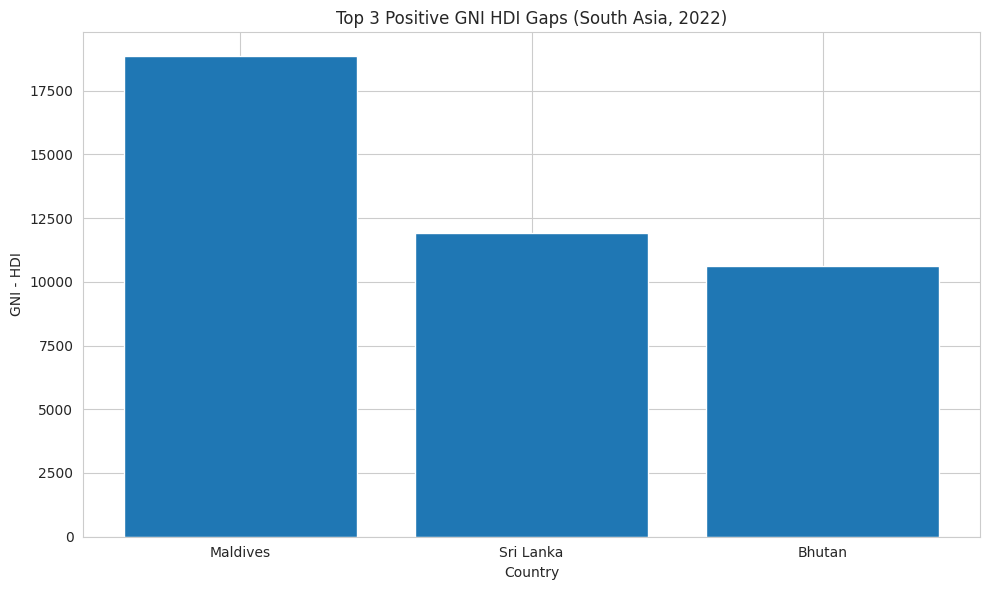

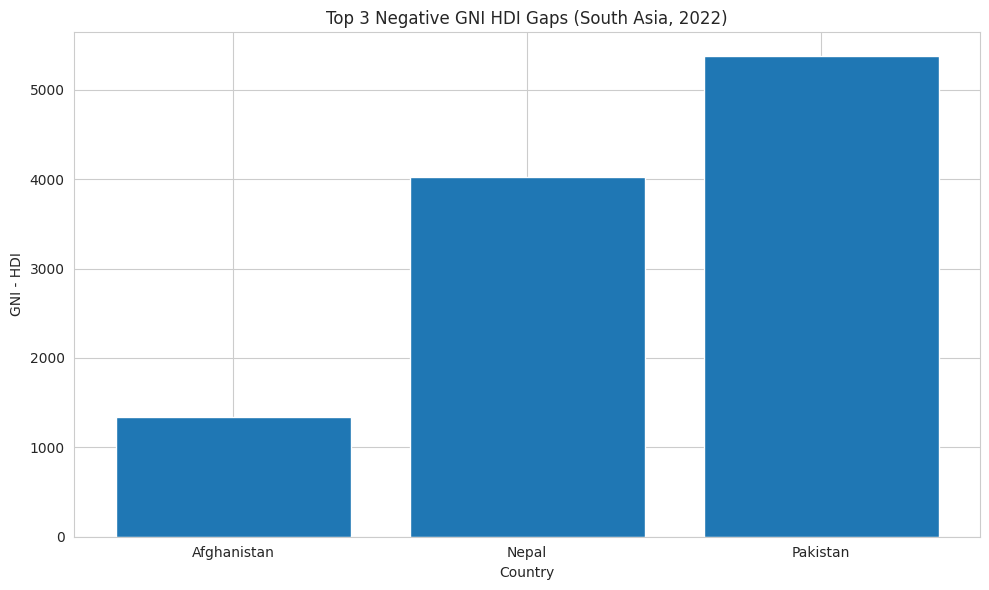

In [333]:
plt.figure()
plt.bar(top3_pos["country"], top3_pos["GNI HDI Gap"])
plt.title("Top 3 Positive GNI HDI Gaps (South Asia, 2022)")
plt.xlabel("Country")
plt.ylabel("GNI - HDI")
plt.tight_layout()
plt.show()

print("\n")

plt.figure()
plt.bar(top3_neg["country"], top3_neg["GNI HDI Gap"])
plt.title("Top 3 Negative GNI HDI Gaps (South Asia, 2022)")
plt.xlabel("Country")
plt.ylabel("GNI - HDI")
plt.tight_layout()
plt.show()

**• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.**

A large positive GNI–HDI gap indicates cases where countries have relatively high income levels but lower human development outcomes than expected. This suggests that economic wealth is not being effectively translated into improvements in health, education, and quality of life. Such gaps may result from unequal income distribution, limited investment in social sectors, weak governance, or insufficient public services.

These findings highlight that economic growth alone is insufficient for achieving high human development and that targeted social policies are essential to convert income gains into meaningful development outcomes.


## Problem 3 – Comparative Regional Analysis: South Asia vs Middle East (2020–2022)

### Task 1 – Create South Asia & Middle East Subsets (2020–2022)

**1. Create Middle East Subset:**

• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].


In [334]:
hdi_problem1B_df = pd.read_csv("HDI_problem1B.csv")

In [335]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.

In [336]:
southasia_df = hdi_problem1B_df[hdi_problem1B_df["country"].isin(south_asian_countries)]
middeleast_df = hdi_problem1B_df[hdi_problem1B_df["country"].isin(middle_east_countries)]

• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.


In [337]:
southasia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middeleast_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print('Files "HDI_SouthAsia_2020_2022.csv" and "HDI_MiddleEast_2020_2022.csv" have been saved.')

Files "HDI_SouthAsia_2020_2022.csv" and "HDI_MiddleEast_2020_2022.csv" have been saved.


### Task 2 – Descriptive Statistics: Mean & Std of HDI

**2. Descriptive Statistics:**

• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.


In [338]:
southasia_df["Region"] = "South Asia"
middeleast_df["Region"] = "Middle East"

combined_1B = pd.concat([southasia_df, middeleast_df], ignore_index=True)

region_stats = combined_1B.groupby("Region")["hdi"].agg(["mean", "std"])
print("Mean and Std of HDI for South Asia vs Middle East (2020–2022):")
print(region_stats)
print()

Mean and Std of HDI for South Asia vs Middle East (2020–2022):
                 mean       std
Region                         
Middle East  0.788909  0.141295
South Asia   0.639583  0.098273



/tmp/ipython-input-400274985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasia_df["Region"] = "South Asia"
/tmp/ipython-input-400274985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middeleast_df["Region"] = "Middle East"


• Identify which region performs better on average.


In [339]:
if region_stats.loc["South Asia", "mean"] > region_stats.loc["Middle East", "mean"]:
    print("South Asia performs better on average HDI.")
else:
    print("Middle East performs better on average HDI.")

Middle East performs better on average HDI.


### Task 3 – Top and Bottom Performers in Each Region

**3. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on HDI.


In [340]:
print("Top 3 and Bottom 3 countries by HDI in each region (2020–2022):\n")

for region_name, df_region in combined_1B.groupby("Region"):
    print(f"Region: {region_name}")
    avg_hdi_country = df_region.groupby("country")["hdi"].mean().reset_index()
    top3 = avg_hdi_country.sort_values(by="hdi", ascending=False).head(3)
    bottom3 = avg_hdi_country.sort_values(by="hdi", ascending=True).head(3)

    print("  Top 3 countries:")
    print(top3)
    print("  Bottom 3 countries:")
    print(bottom3)
    print()

Top 3 and Bottom 3 countries by HDI in each region (2020–2022):

Region: Middle East
  Top 3 countries:
                country       hdi
9  United Arab Emirates  0.932667
2                Israel  0.910667
0               Bahrain  0.885333
  Bottom 3 countries:
    country       hdi
10    Yemen  0.426333
1      Iraq  0.667000
5   Lebanon  0.730000

Region: South Asia
  Top 3 countries:
     country       hdi
7  Sri Lanka  0.780000
4   Maldives  0.750667
2     Bhutan  0.677667
  Bottom 3 countries:
       country       hdi
0  Afghanistan  0.474333
6     Pakistan  0.537667
5        Nepal  0.595000



• Create a bar chart comparing these top and bottom performers across the two regions.


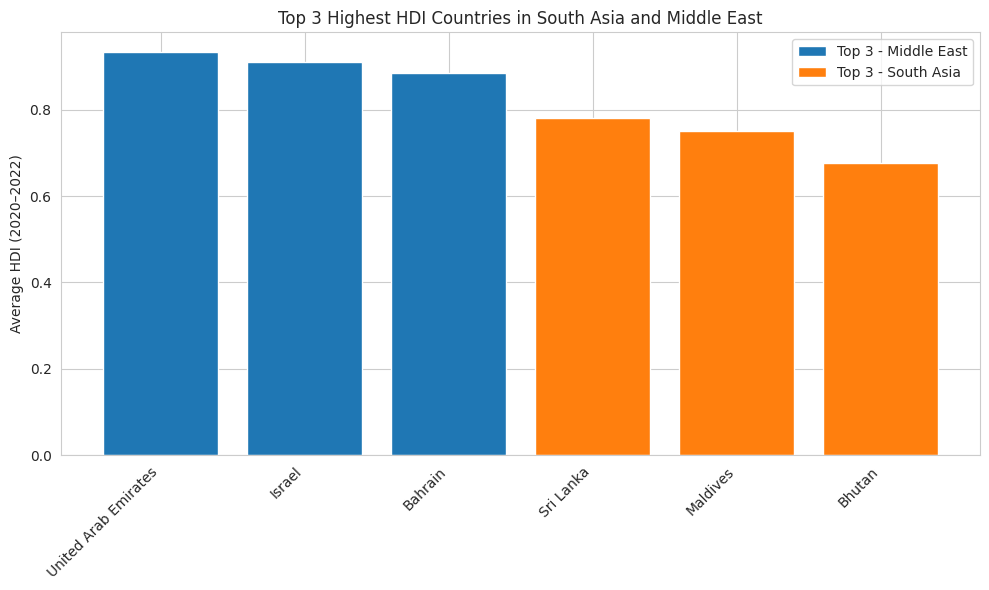

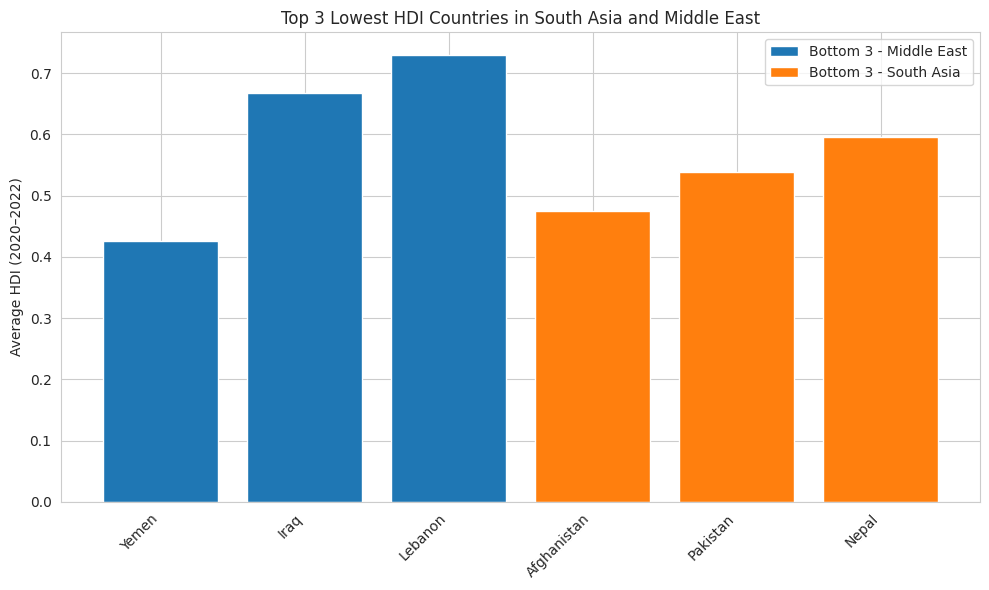

In [341]:
plt.figure()
for region_name, df_region in combined_1B.groupby("Region"):
    avg_hdi_country = df_region.groupby("country")["hdi"].mean().reset_index()
    top3 = avg_hdi_country.sort_values(by="hdi", ascending=False).head(3)
    plt.bar(top3["country"], top3["hdi"], label=f"Top 3 - {region_name}")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top 3 Highest HDI Countries in South Asia and Middle East")
plt.legend()
plt.tight_layout()
plt.show()

print("\n")

plt.figure()
for region_name, df_region in combined_1B.groupby("Region"):
    avg_hdi_country = df_region.groupby("country")["hdi"].mean().reset_index()
    bottom3 = avg_hdi_country.sort_values(by="hdi", ascending=True).head(3)
    plt.bar(bottom3["country"], bottom3["hdi"], label=f"Bottom 3 - {region_name}")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top 3 Lowest HDI Countries in South Asia and Middle East")
plt.legend()
plt.tight_layout()
plt.show()

### Task 4 – Metric Comparisons Between Regions

**4. Metric Comparisons:**

• Compare the following metrics across regions using grouped bar charts:

– Gender Development Index {"gender development"}

– Life Expectancy Index {"life expectancy"}

– GNI per Capita Index {"gross inc percap"}


Mean of key metrics by Region (2020–2022):
        Region  gender_development  life_expectancy  gross_inc_percap
0  Middle East            0.896545        75.855455      37750.770520
1   South Asia            0.881458        70.970083       7766.509931


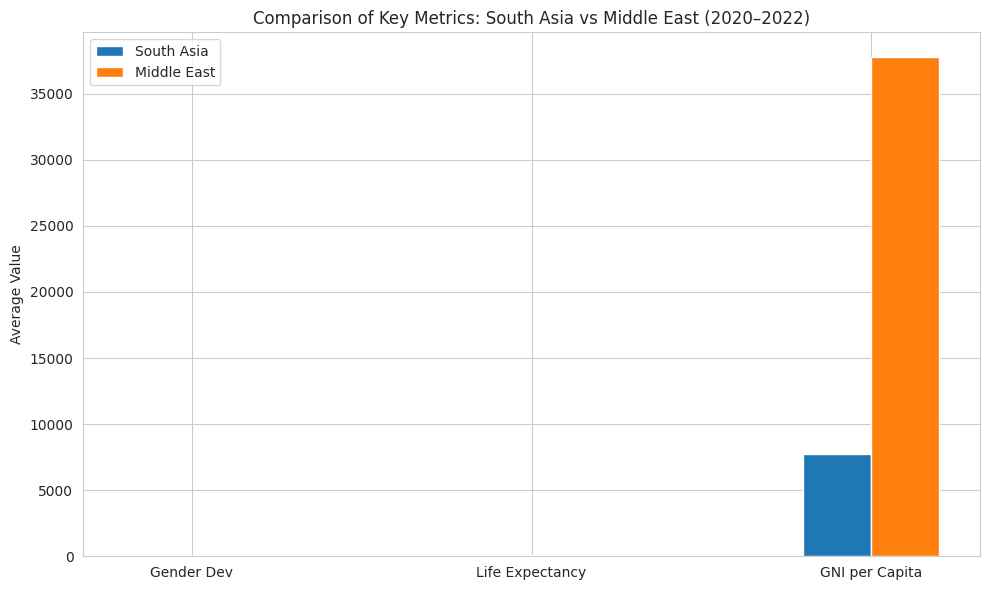

In [342]:
metrics_comp = ["gender_development", "life_expectancy", "gross_inc_percap"]

metric_means = combined_1B.groupby("Region")[metrics_comp].mean().reset_index()
print("Mean of key metrics by Region (2020–2022):")
print(metric_means)

x = np.arange(len(metrics_comp))
width = 0.20

southasia_values = metric_means[metric_means["Region"] == "South Asia"][metrics_comp].values.flatten()
middleeast_values = metric_means[metric_means["Region"] == "Middle East"][metrics_comp].values.flatten()

plt.figure()
plt.bar(x - width/2, southasia_values, width, label="South Asia")
plt.bar(x + width/2, middleeast_values, width, label="Middle East")

labels = ["Gender Dev", "Life Expectancy", "GNI per Capita"]
plt.xticks(x, labels)
plt.ylabel("Average Value")
plt.title("Comparison of Key Metrics: South Asia vs Middle East (2020–2022)")
plt.legend()
plt.tight_layout()
plt.show()

**• Identify which metric shows the greatest disparity between regions.**

Grouped bar charts were used to compare Gender Development Index, Life Expectancy Index, and GNI per Capita Index between South Asia and the Middle East.

The results show that GNI per Capita Index exhibits the greatest disparity between the two regions, with the Middle East having significantly higher income levels on average. Life Expectancy also shows noticeable differences, while Gender Development Index displays comparatively smaller variation. This suggests that economic inequality is the most prominent factor distinguishing development levels between the regions.

### Task 5 – HDI Disparity: Range and Coefficient of Variation

**# 5. HDI Disparity:**

• Compute the range (max – min) of HDI for each region.


In [343]:
southasia_range = southasia_df["hdi"].max() - southasia_df["hdi"].min()
middeleast_range = middeleast_df["hdi"].max() - middeleast_df["hdi"].min()
print(f"Range in South Asia: {southasia_range:.3f}")
print(f"Range in Middle East: {middeleast_range:.3f}")

Range in South Asia: 0.321
Range in Middle East: 0.513


• Compute the coefficient of variation (CV = std/mean) for HDI.


In [344]:
southasia_cv = southasia_df['hdi'].std() / southasia_df['hdi'].mean()
middeleast_cv = middeleast_df['hdi'].std() / middeleast_df['hdi'].mean()
print(f"Coefficient of variation in South Asia: {southasia_cv:.3f}")
print(f"Coefficient of variation in Middle East: {middeleast_cv:.3f}")

Coefficient of variation in South Asia: 0.154
Coefficient of variation in Middle East: 0.179


**• Identify which region exhibits more variation in HDI.**

HDI disparity was measured using the range and the coefficient of variation for each region. The range highlights the difference between the highest and lowest HDI values, while the coefficient of variation captures relative variability by accounting for differences in mean HDI.

The results show that South Asia exhibits greater variation in HDI compared to the Middle East, as indicated by a larger HDI range and a higher coefficient of variation. This suggests that human development outcomes are more uneven across South Asian countries, whereas the Middle East displays relatively more consistency in HDI levels.

### Task 6 – Correlation of HDI with Gender Development and Life Expectancy

**6. Correlation Analysis:**

• For each region, compute correlations of HDI with:

– Gender Development Index

– Life Expectancy Index

In [345]:
south_asia = combined_1B[combined_1B["Region"] == "South Asia"]
middle_east = combined_1B[combined_1B["Region"] == "Middle East"]

# Computing correlations (South Asia)
southasia_corr_gender = south_asia["hdi"].corr(south_asia["gender_development"])
southasia_corr_lifeexp = south_asia["hdi"].corr(south_asia["life_expectancy"])

print("South Asia Correlations:")
print(f"HDI vs Gender Development: {southasia_corr_gender:.3f}")
print(f"HDI vs Life Expectancy   : {southasia_corr_lifeexp:.3f}")


# Computing correlations (Middle East)
middleeast_corr_gender = middle_east["hdi"].corr(middle_east["gender_development"])
middleeast_corr_lifeexp = middle_east["hdi"].corr(middle_east["life_expectancy"])

print("\nMiddle East Correlations:")
print(f"HDI vs Gender Development: {middleeast_corr_gender:.3f}")
print(f"HDI vs Life Expectancy   : {middleeast_corr_lifeexp:.3f}")

South Asia Correlations:
HDI vs Gender Development: 0.874
HDI vs Life Expectancy   : 0.939

Middle East Correlations:
HDI vs Gender Development: 0.936
HDI vs Life Expectancy   : 0.933


• Create scatter plots with trendlines for each correlation.


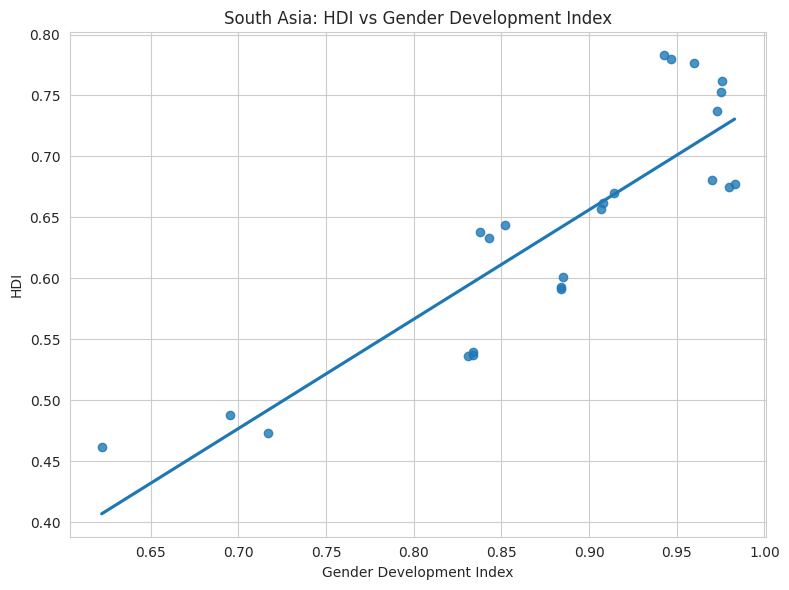

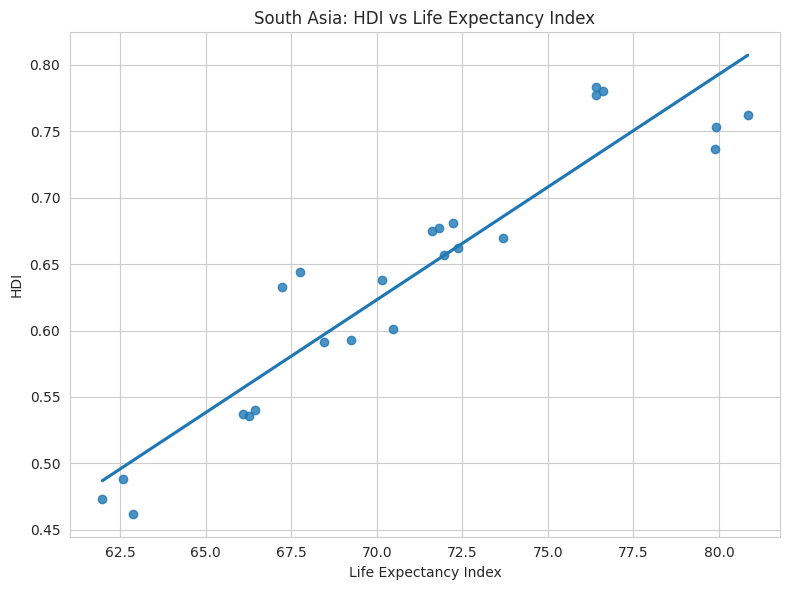

In [346]:
# Scatter plot with trendline: South Asia

plt.figure(figsize=(8,6))
sns.regplot(
    data=south_asia,
    x="gender_development",
    y="hdi",
    ci=None
)
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development Index")
plt.tight_layout()
plt.show()

print("\n")

plt.figure(figsize=(8,6))
sns.regplot(
    data=south_asia,
    x="life_expectancy",
    y="hdi",
    ci=None
)
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy Index")
plt.tight_layout()
plt.show()


**• Interpret the strength and direction of these relationships.**

Pearson correlation analysis shows that Life Expectancy Index has a strong positive relationship with HDI in both South Asia and the Middle East, indicating that health outcomes are a key driver of human development.

The Gender Development Index also shows a positive relationship with HDI, but the correlation is weaker compared to life expectancy. This suggests that while gender equality contributes to development, improvements in health have a more direct impact on HDI levels across both regions.

### Task 7 – Outlier Detection (HDI & GNI) for Each Region

**7. Outlier Detection:**

• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.


In [347]:
def outliers_detect(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


# Creating regional subsets (explicit copies)
southasia_df = combined_1B[combined_1B["Region"] == "South Asia"].copy()
middeleast_df = combined_1B[combined_1B["Region"] == "Middle East"].copy()


# Detect outliers in HDI and GNI per Capita
southasia_df["Outlier"] = (
    outliers_detect(southasia_df["hdi"]) |
    outliers_detect(southasia_df["gross_inc_percap"])
)

middeleast_df["Outlier"] = (
    outliers_detect(middeleast_df["hdi"]) |
    outliers_detect(middeleast_df["gross_inc_percap"])
)


# Display outlier countries
print("South Asia Outlier Countries:")
print(southasia_df[southasia_df["Outlier"]][["country", "hdi", "gross_inc_percap"]])

print("\nMiddle East Outlier Countries:")
print(middeleast_df[middeleast_df["Outlier"]][["country", "hdi", "gross_inc_percap"]])

South Asia Outlier Countries:
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []

Middle East Outlier Countries:
   country    hdi  gross_inc_percap
54   Yemen  0.430       1152.015672
55   Yemen  0.425       1112.162989
56   Yemen  0.424       1105.763435


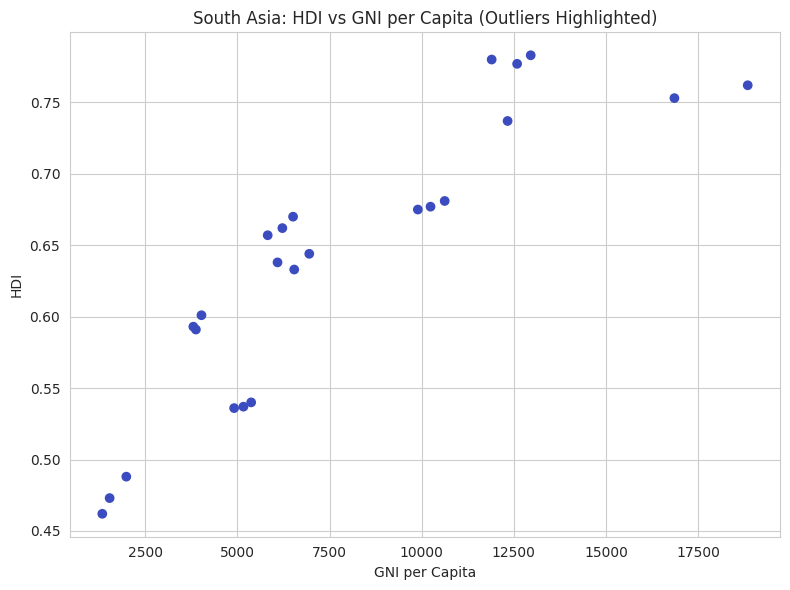

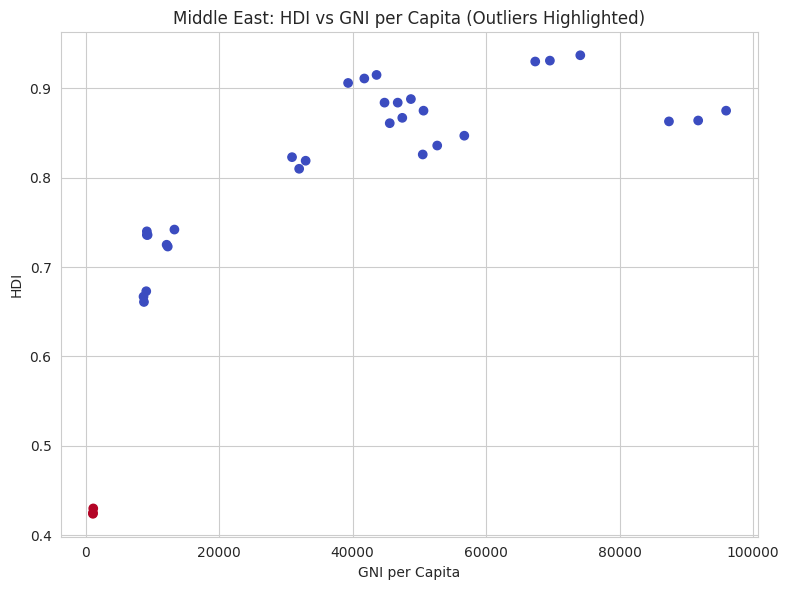

In [348]:
# Scatter plot: South Asia

plt.figure(figsize=(8,6))
plt.scatter(
    southasia_df["gross_inc_percap"],
    southasia_df["hdi"],
    c=southasia_df["Outlier"],
    cmap="coolwarm"
)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.tight_layout()
plt.show()


# Scatter plot: Middle East

plt.figure(figsize=(8,6))
plt.scatter(
    middeleast_df["gross_inc_percap"],
    middeleast_df["hdi"],
    c=middeleast_df["Outlier"],
    cmap="coolwarm"
)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.tight_layout()
plt.show()

**• Discuss the significance of these outliers.**

The outliers identified using the 1.5 × IQR rule represent countries with unusually high or low HDI or GNI per capita relative to their region. These countries stand out because their development outcomes differ significantly from regional trends, indicating that factors beyond income, such as health, education, or governance, strongly influence human development.